In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix





In [27]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("Classes: ", target_names)
print("Features: ", feature_names)

Classes:  ['malignant' 'benign']
Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train,y_train)

y_pred_linear = svm_linear.predict(x_test)
print("Linear kernal Accuracy:",  svm_linear.score(x_test, y_test))
print(classification_report(y_test, y_pred_linear))

Linear kernal Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [41]:
svm_rbf = SVC(kernel='rbf', C=1, gamma= 'scale')
svm_rbf.fit(x_train, y_train)

y_pred_rbf = svm_rbf.predict(x_test)
print("RBF HAVING KERNAL ACCURACY:", svm_rbf.score(x_test, y_test))
print(classification_report(y_test, y_pred_rbf))

RBF HAVING KERNAL ACCURACY: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [43]:
C_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1, 1]

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        scores = cross_val_score(model, X_scaled, y, cv=5)
        print(f"C={C}, gamma={gamma}, Mean Accuracy={scores.mean():.4f}")


C=0.1, gamma=0.001, Mean Accuracy=0.7910
C=0.1, gamma=0.01, Mean Accuracy=0.9473
C=0.1, gamma=0.1, Mean Accuracy=0.9350
C=0.1, gamma=1, Mean Accuracy=0.6274
C=1, gamma=0.001, Mean Accuracy=0.9473
C=1, gamma=0.01, Mean Accuracy=0.9666
C=1, gamma=0.1, Mean Accuracy=0.9596
C=1, gamma=1, Mean Accuracy=0.6309
C=10, gamma=0.001, Mean Accuracy=0.9737
C=10, gamma=0.01, Mean Accuracy=0.9789
C=10, gamma=0.1, Mean Accuracy=0.9473
C=10, gamma=1, Mean Accuracy=0.6362


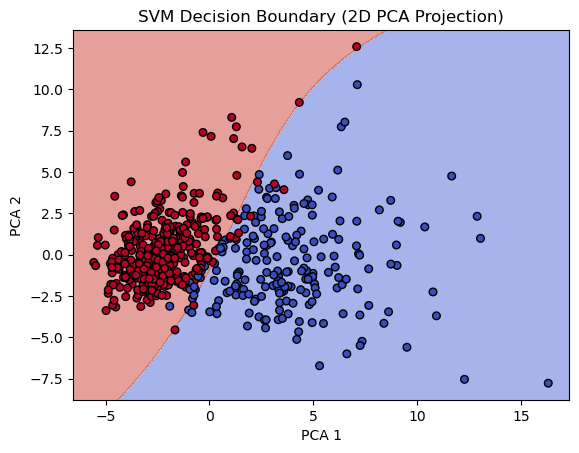

In [45]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

model = SVC(kernel='rbf', C=1, gamma=0.01)
model.fit(X_pca, y)


x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM Decision Boundary (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


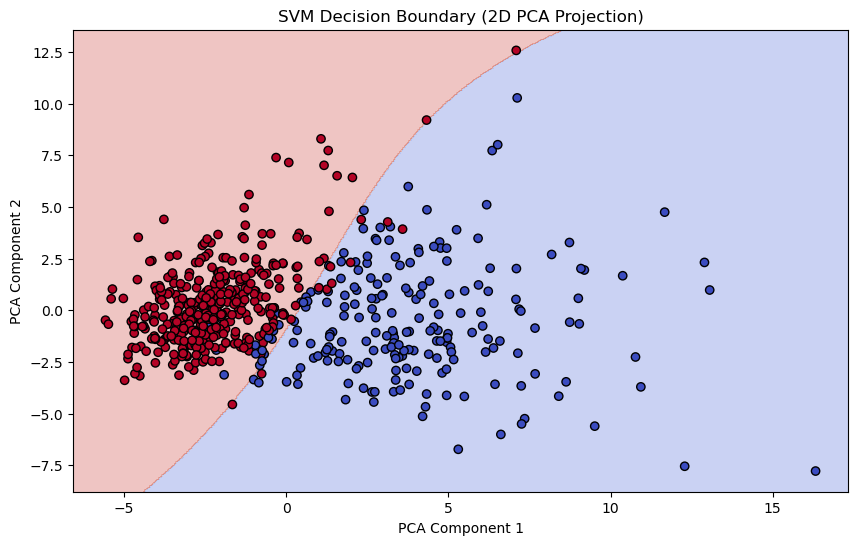

In [48]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


svm_2d = SVC(kernel='rbf', C=1, gamma=0.01)
svm_2d.fit(X_pca, y)


x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM Decision Boundary (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


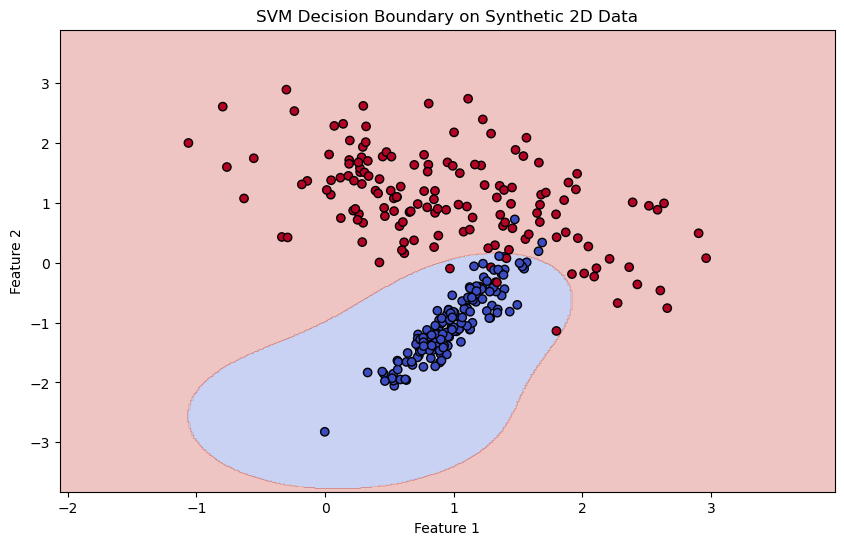

In [49]:
from sklearn.datasets import make_classification


X_synth, y_synth = make_classification(n_samples=300, n_features=2, n_redundant=0, 
                                       n_informative=2, n_clusters_per_class=1, random_state=42)


svm_demo = SVC(kernel='rbf', C=1, gamma='auto')
svm_demo.fit(X_synth, y_synth)


x_min, x_max = X_synth[:, 0].min() - 1, X_synth[:, 0].max() + 1
y_min, y_max = X_synth[:, 1].min() - 1, X_synth[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm_demo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_synth[:, 0], X_synth[:, 1], c=y_synth, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM Decision Boundary on Synthetic 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
